In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ✅ Load Your DataFrame (Assume `df` has 'Setpoint' and 'Measured')
df1   = pd.read_excel(r"D:\Projects\PID\adani-program\data\SuperHeaters.xlsx") # Replace with actual DataFrame
#time = np.arange(len(df)) # Time index

In [3]:
df = df1.copy() 

In [4]:
df = df1[::-1][:500]

In [5]:
df1.columns

Index(['time', 'KAWAI_U2_LD_1', 'KAWAI_U2_MN_STM_PRESS_2',
       'KAWAI_U2_ECON_FD_WTR_INLT_FL_2', 'KAWAI_U2_1ST_STG_LHS_MN_P_PID_SP',
       'KAWAI_U2_1ST_STG_LHS_MN_P_PID_MEAS',
       'KAWAI_U2_1ST_STG_LHS_MN_P_PID_OP', 'KAWAI_U2_1ST_STG_LHS_MN_S_PID_SP',
       'KAWAI_U2_1ST_STG_LHS_MN_S_PID_MEAS',
       'KAWAI_U2_1ST_STG_LHS_MN_S_PID_OP',
       'KAWAI_U2_SPHT_FRST_STG_DESH_SPRY_WTR_CTRL_VLV_A_LHS_PSN',
       'KAWAI_U2_1ST_STG_LHS_BP_P_PID_SP',
       'KAWAI_U2_1ST_STG_LHS_BP_P_PID_MEAS',
       'KAWAI_U2_1ST_STG_LHS_BP_P_PID_OP', 'KAWAI_U2_1ST_STG_LHS_BP_S_PID_SP',
       'KAWAI_U2_1ST_STG_LHS_BP_S_PID_MEAS',
       'KAWAI_U2_1ST_STG_LHS_BP_S_PID_OP',
       'KAWAI_U2_SPHT_FRST_STG_DESH_SPRY_WTR_CTRL_VLV_A_RHS_PSN',
       'KAWAI_U2_SPHT_FRST_STG_DESH_SPRY_WTR_FL_1_LHS',
       'KAWAI_U2_1ST_STG_RHS_MN_P_PID_SP',
       'KAWAI_U2_1ST_STG_RHS_MN_P_PID_MEAS',
       'KAWAI_U2_1ST_STG_RHS_MN_P_PID_OP', 'KAWAI_U2_1ST_STG_RHS_MN_S_PID_SP',
       'KAWAI_U2_1ST_STG_RHS_MN_S_PID_MEAS

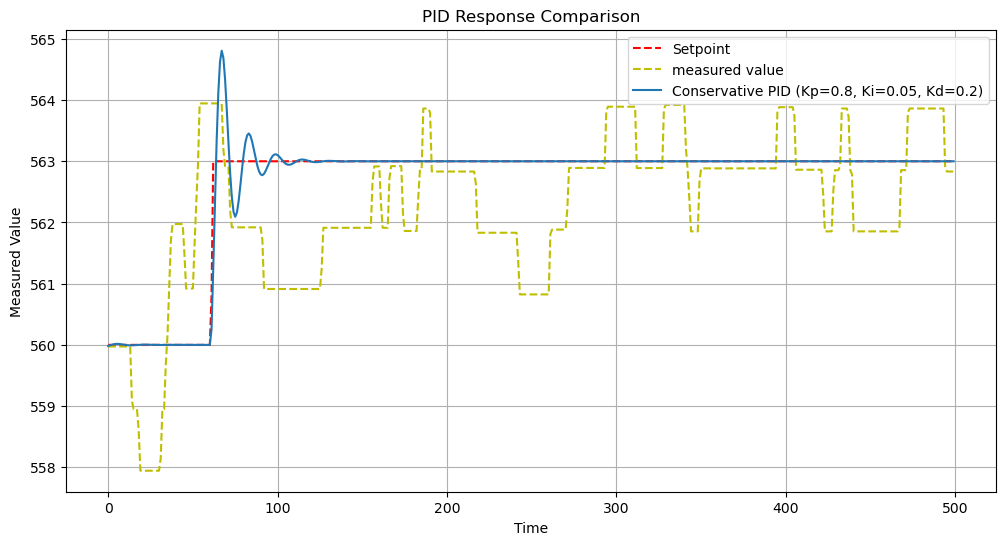

In [7]:
class PID:
    def __init__(self, Kp, Ki, Kd, integral_limit=5000):
        self.Kp             = Kp
        self.Ki             = Ki
        self.Kd             = Kd
        self.integral       = 0
        self.previous_error = 0
        self.integral_limit = integral_limit # Anti-windup limit

    def update(self, setpoint, measured_value, dt):
        error = setpoint - measured_value
        self.integral += error * dt
        self.integral = max(min(self.integral, self.integral_limit), -self.integral_limit) # Anti-windup

        derivative = (error - self.previous_error) / dt if dt > 0 else 0
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.previous_error = error
        return output

# ✅ Load Your DataFrame (Assume `df` has 'Setpoint' and 'Measured')
#df   = pd.read_excel(r"D:\Projects\PID\adani-program\data\SuperHeaters.xlsx") # Replace with actual DataFrame
time = np.arange(len(df)) # Time index

# ✅ Define Different PID Tunings
pid_tunings = {
#"Aggressive"  : (3.0, 0.2, 1.0),
#"Moderate"    : (1.5, 0.1, 0.5),
"Conservative": (0.8, 0.05, 0.2)
}

# ✅ Simulate PID Response for Different Tunings
plt.figure(figsize=(12, 6))
plt.plot(time, df['KAWAI_U2_2ND_STG_RHS_MN_P_PID_SP'], 'r--', label="Setpoint")
plt.plot(time, df['KAWAI_U2_2ND_STG_RHS_MN_P_PID_MEAS'], 'y--', label="measured value")

for label, (Kp, Ki, Kd) in pid_tunings.items():
    pid = PID(Kp, Ki, Kd)
    simulated_values = []
    measured_value = df["KAWAI_U2_2ND_STG_RHS_MN_P_PID_MEAS"].iloc[0] # Start from first measured value

for i in range(len(df)):
    output = pid.update(df["KAWAI_U2_2ND_STG_RHS_MN_P_PID_SP"].iloc[i], measured_value, dt=15) # Assume dt=1 second
    measured_value += 0.2 * output # Process response model
    simulated_values.append(measured_value)

plt.plot(time, simulated_values, label=f"{label} PID (Kp={Kp}, Ki={Ki}, Kd={Kd})")

# ✅ Plot Results
plt.xlabel("Time")
plt.ylabel("Measured Value")
plt.title("PID Response Comparison")
plt.legend()
plt.grid(True)
plt.show()